<a href="https://colab.research.google.com/github/Raihan4520/Neural-Network/blob/main/NN_Using__PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network Using PyTorch**

In [ ]:
# Install packages
!pip install torchsummary

In [ ]:
# Package imports
import time
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
from torchsummary import summary


Shape of matrix X: (200, 2)
Shape of matrix Y: (200, 1)



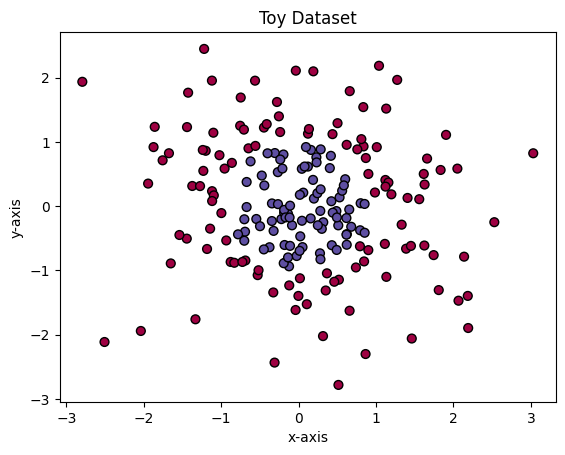

In [ ]:
# Create toy dataset
np.random.seed(1)
X = np.random.randn(200, 2)
Y = (np.linalg.norm(X, axis=1) < 1).astype(int).reshape(-1, 1)

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Toy Dataset')
plt.scatter(X[:,0], X[:,1], s=40, c=Y, cmap=plt.cm.Spectral, edgecolors='k')

print("Shape of matrix X:", X.shape)
print("Shape of matrix Y:", Y.shape)
print()


In [ ]:
# Create neural network class
class NeuralNetwork(torch.nn.Module):
  def __init__(self): # Build the model
    super(NeuralNetwork, self).__init__()
    self.model = torch.nn.Sequential(
      torch.nn.Linear(2, 20),  # Hidden layer 1
      torch.nn.ReLU(),         # Activation for hidden layer 1
      torch.nn.Linear(20, 10), # Hidden layer 2
      torch.nn.ReLU(),         # Activation for hidden layer 2
      torch.nn.Linear(10, 1),  # Output layer
      torch.nn.Sigmoid()       # Activation for output layer
    )

  def forward(self, x):
    return self.model(x)


In [ ]:
# Initialize the model
my_model = NeuralNetwork()
summary(my_model, input_size=(2,))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 20]              60
              ReLU-2                   [-1, 20]               0
            Linear-3                   [-1, 10]             210
              ReLU-4                   [-1, 10]               0
            Linear-5                    [-1, 1]              11
           Sigmoid-6                    [-1, 1]               0
Total params: 281
Trainable params: 281
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [ ]:
# Loss and optimizer
criterion = torch.nn.BCELoss()  # Binary cross-entropy
optimizer = torch.optim.SGD(my_model.parameters(), lr=0.1)  # Gradient descent


In [ ]:
# Training the model

# Convert NumPy arrays to PyTorch tensors (float tensor for BCE loss)
X_tensor = torch.from_numpy(X).float()
Y_tensor = torch.from_numpy(Y).float()

bce = [] # Binary cross-entropy
epochs = 1000

# Record start time
start_time = time.time()

for epoch in range(epochs):
  my_model.train()  # Set model to training mode

  # Forward pass
  outputs = my_model(X_tensor)
  loss = criterion(outputs, Y_tensor)

  # Backward pass and optimization
  optimizer.zero_grad()  # Clear previous gradients
  loss.backward()        # Backpropagation
  optimizer.step()       # Update weights

  bce.append(loss.item())

  if epoch == 0 or (epoch + 1) % 100 == 0:  # Print loss every 100 epochs
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Record end time
end_time = time.time()

# Calculate and print training time
training_time = end_time - start_time
print("---------------------------------")
print(f"Total training time: {training_time:.2f} seconds")
print("---------------------------------")


Epoch [1/1000], Loss: 0.6800
Epoch [100/1000], Loss: 0.4672
Epoch [200/1000], Loss: 0.2033
Epoch [300/1000], Loss: 0.1102
Epoch [400/1000], Loss: 0.0723
Epoch [500/1000], Loss: 0.0526
Epoch [600/1000], Loss: 0.0407
Epoch [700/1000], Loss: 0.0328
Epoch [800/1000], Loss: 0.0272
Epoch [900/1000], Loss: 0.0230
Epoch [1000/1000], Loss: 0.0196
---------------------------------
Total training time: 1.97 seconds
---------------------------------


Text(0.5, 1.0, 'Binary Cross-Entropy')

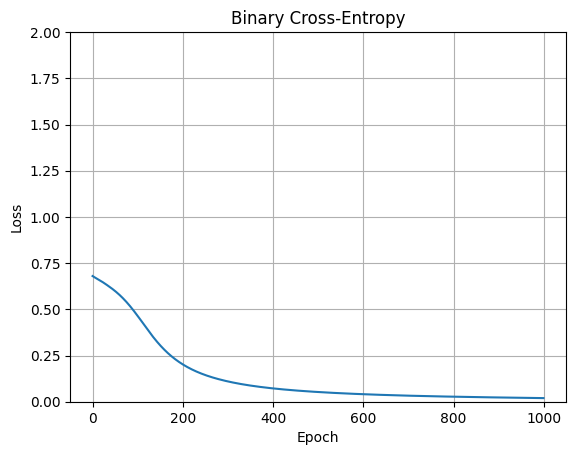

In [ ]:
# Plot binary cross-entropy
plt.plot(bce)
plt.ylim(0, 2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.title("Binary Cross-Entropy")


In [ ]:
# Helper function to plot a decision boundary
def plot_decision_boundary(pred_func):
  # Create a meshgrid for plotting decision boundaries
  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))

  # Predict the entire grid of points
  grid = np.c_[xx.ravel(), yy.ravel()]

  # Convert the grid to a PyTorch tensor and pass it to the model
  grid_tensor = torch.from_numpy(grid).float()

  # Get model predictions and convert them back to NumPy
  Z = pred_func(grid_tensor).detach().numpy()

  # Reshape the predictions to match the grid shape
  Z = Z.reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.8, cmap=plt.cm.Spectral)
  plt.scatter(X[:, 0], X[:, 1], c=Y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='k')


Text(0.5, 1.0, 'Decision Boundary')

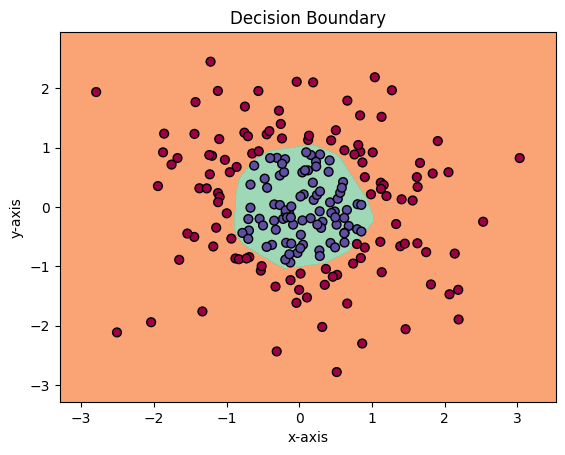

In [ ]:
# Plot the decision boundary
plot_decision_boundary(lambda x: my_model(x))
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title("Decision Boundary")
